In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import wilcoxon
from sklearn.metrics import matthews_corrcoef
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

# **Decision Tree with SMOTE**

In [5]:
def DT_SMOTE(file_name):
    global DT_Scores
    global DT_accuracy

    Dataset = pd.read_csv(file_name)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote = SMOTE(random_state=0)

    X_resampled, Y_resampled = smote.fit_resample(X, Y)

    tree = DecisionTreeClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    DT_Scores = cross_val_score(tree, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    DT_accuracy = cross_val_score(tree, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(DT_Scores.mean()))
    print("Best accuracy is {}".format(DT_accuracy.mean()))

# **Random Forest with SMOTE**

In [7]:
def RF_SMOTE(file_name):
    global RF_Scores
    global RF_Accuracy

    Dataset = pd.read_csv(file_name)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote = SMOTE(random_state=0)

    X_resampled, Y_resampled = smote.fit_resample(X, Y)

    rf = RandomForestClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    RF_Scores = cross_val_score(rf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    RF_Accuracy = cross_val_score(rf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(RF_Scores.mean()))
    print("Best accuracy is {}".format(RF_Accuracy.mean()))

# **XGBoost Classifier**

In [8]:
def XGBoost_Classifier(file_name):
    global XGB_Scores
    global XGB_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    XGB_Scores = cross_val_score(xgb_clf, X, Y, scoring=mcc, cv=rfolds)

    XGB_Accuracy = cross_val_score(xgb_clf, X, Y, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(XGB_Scores.mean()))
    print("Best accuracy is {}".format(XGB_Accuracy.mean()))

# **XGBoost Classifier with SMOTE**

In [9]:
def XGBoost_SMOTE(file_name):
    global XGB_Scores
    global XGB_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote = SMOTE(random_state=0)
    X_resampled, Y_resampled = smote.fit_resample(X, Y)

    xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    XGB_Scores = cross_val_score(xgb_clf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    XGB_Accuracy = cross_val_score(xgb_clf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(XGB_Scores.mean()))
    print("Best accuracy is {}".format(XGB_Accuracy.mean()))

# **XGBoost Classifier with SMOTEENN**

In [10]:
def XGBoost_SMOTEENN(file_name):
    global XGB_Scores
    global XGB_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote_enn = SMOTEENN(random_state=0)
    X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

    xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    XGB_Scores = cross_val_score(xgb_clf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    XGB_Accuracy = cross_val_score(xgb_clf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(XGB_Scores.mean()))
    print("Best accuracy is {}".format(XGB_Accuracy.mean()))

# **LightGBM Classifier**

In [11]:
def LightGBM_Classifier(file_name):
    global LGBM_Scores
    global LGBM_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    lgbm_clf = LGBMClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    LGBM_Scores = cross_val_score(lgbm_clf, X, Y, scoring=mcc, cv=rfolds)

    LGBM_Accuracy = cross_val_score(lgbm_clf, X, Y, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(LGBM_Scores.mean()))
    print("Best accuracy is {}".format(LGBM_Accuracy.mean()))

# **LightGBM with SMOTE**

In [12]:
def LightGBM_SMOTE(file_name):
    global LGBM_Scores
    global LGBM_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote = SMOTE(random_state=0)

    X_resampled, Y_resampled = smote.fit_resample(X, Y)

    lgbm_clf = LGBMClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    LGBM_Scores = cross_val_score(lgbm_clf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    LGBM_Accuracy = cross_val_score(lgbm_clf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(LGBM_Scores.mean()))
    print("Best accuracy is {}".format(LGBM_Accuracy.mean()))

# **LightGBM with SMOTEENN**

In [13]:
def LightGBM_SMOTEENN(file_name):
    global LGBM_Scores
    global LGBM_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote_enn = SMOTEENN(random_state=0)

    X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

    lgbm_clf = LGBMClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    LGBM_Scores = cross_val_score(lgbm_clf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    LGBM_Accuracy = cross_val_score(lgbm_clf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(LGBM_Scores.mean()))
    print("Best accuracy is {}".format(LGBM_Accuracy.mean()))

# **AdaBoost Classifier**

In [14]:
def AdaBoost_Classifier(file_name):
    global AB_Scores
    global AB_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    ab_clf = AdaBoostClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    AB_Scores = cross_val_score(ab_clf, X, Y, scoring=mcc, cv=rfolds)

    AB_Accuracy = cross_val_score(ab_clf, X, Y, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(AB_Scores.mean()))
    print("Best accuracy is {}".format(AB_Accuracy.mean()))

# **AdaBoost with SMOTE**

In [15]:
def AdaBoost_SMOTE(file_name):
    global AB_Scores
    global AB_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote = SMOTE(random_state=0)

    X_resampled, Y_resampled = smote.fit_resample(X, Y)

    ab_clf = AdaBoostClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    AB_Scores = cross_val_score(ab_clf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    AB_Accuracy = cross_val_score(ab_clf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(AB_Scores.mean()))
    print("Best accuracy is {}".format(AB_Accuracy.mean()))

# **AdaBoost with SMOTEENN**

In [16]:
def AdaBoost_SMOTEENN(file_name):
    global AB_Scores
    global AB_Accuracy

    Dataset = pd.read_csv(file_name)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    smote_enn = SMOTEENN(random_state=0)

    X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)

    ab_clf = AdaBoostClassifier()

    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    mcc = make_scorer(matthews_corrcoef)

    AB_Scores = cross_val_score(ab_clf, X_resampled, Y_resampled, scoring=mcc, cv=rfolds)

    AB_Accuracy = cross_val_score(ab_clf, X_resampled, Y_resampled, scoring='accuracy', cv=rfolds)

    print("Best MCC score is {}".format(AB_Scores.mean()))
    print("Best accuracy is {}".format(AB_Accuracy.mean()))

# **Dataset Exploration**

In [17]:
def explore_dataset(file_name):

    Dataset = pd.read_csv(file_name)

    print("First few rows of the dataset:")
    print(Dataset.head())
    print("\nDataset Information:")
    print(Dataset.info())
    print("\nStatistical Summary:")
    print(Dataset.describe())

    print("\nFeature Distributions:")
    Dataset.hist(bins=15, figsize=(15, 10), layout=(5, 5))
    plt.suptitle("Feature Distributions")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 8))
    correlation_matrix = Dataset.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    if Dataset.shape[1] <= 10:
        print("\nPair Plot of Features")
        sns.pairplot(Dataset)
        plt.show()

    missing_values = Dataset.isnull().sum()
    print("\nMissing Values per Feature:")
    print(missing_values[missing_values > 0])

    if 'target' in Dataset.columns:
        from sklearn.ensemble import RandomForestClassifier
        X = Dataset.drop('target', axis=1)
        y = Dataset['target']
        model = RandomForestClassifier(random_state=0)
        model.fit(X, y)
        feature_importances = pd.Series(model.feature_importances_, index=X.columns)

        feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
        plt.title("Feature Importance (Random Forest)")
        plt.show()

# **Large Class Dataset**

First few rows of the dataset:
    loc  lloc  scloc  comments  single_comments  multi_comments  blanks  h1  \
0   469   247    371        10               17              28      53  11   
1   141    84     93         1                1              16      31   2   
2   473   259    290        51               51              73      59  13   
3  1267   721    883        78               79             144     161  12   
4   174   114    126        16               18              11      19   8   

    h2   n1   n2  vocabulary  length  calculated_length       volume  \
0  104   67  109         115     176         734.899478  1204.806249   
1    4    3    4           6       7          10.000000    18.094738   
2   92   56  105         105     161         648.273416  1080.993528   
3  286  175  333         298     508        2376.742752  4175.337608   
4   40   23   45          48      68         236.877124   379.777450   

   difficulty        effort         time      bugs  LargeClas

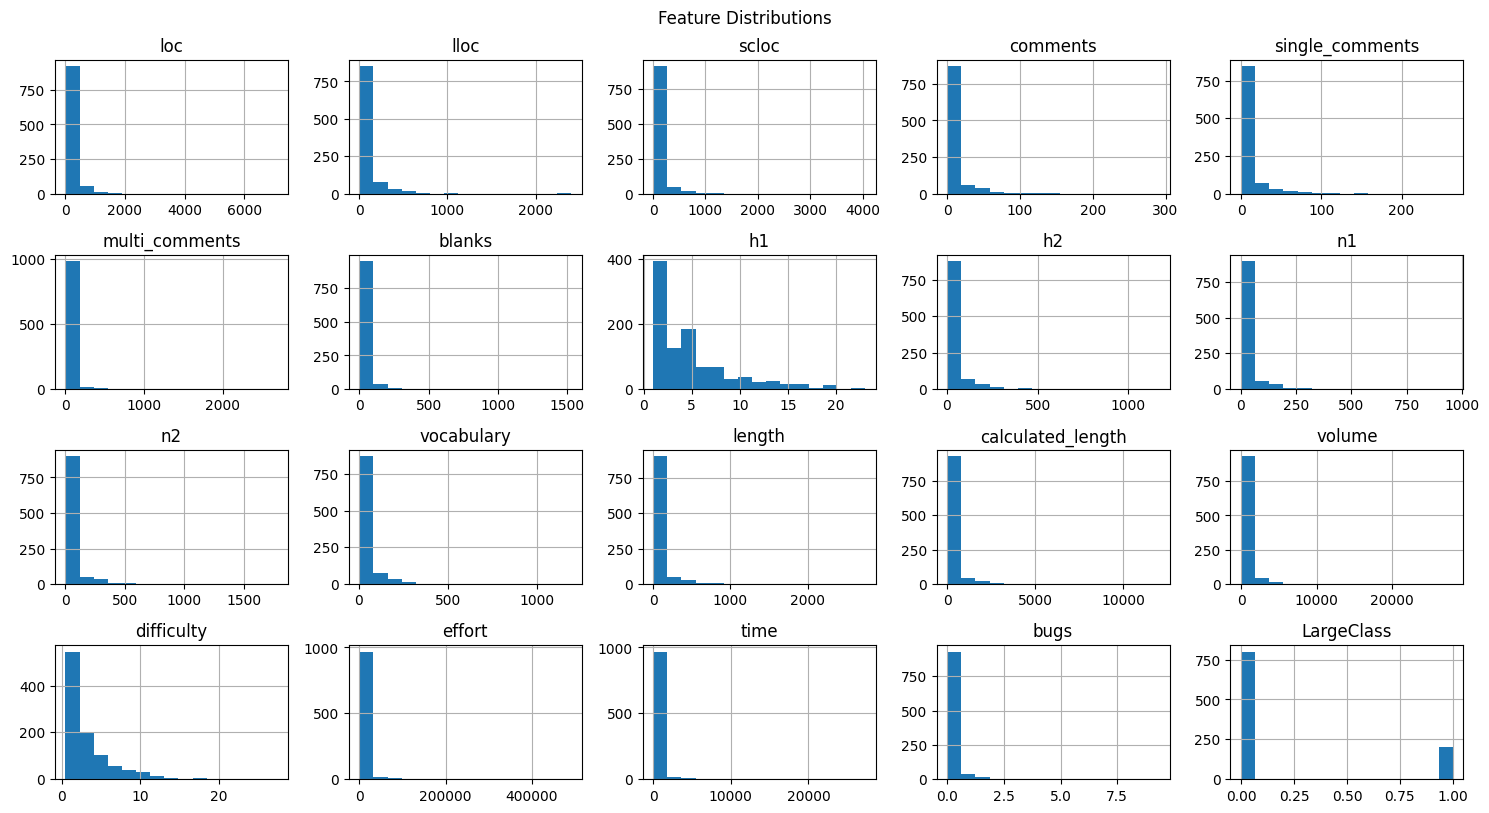

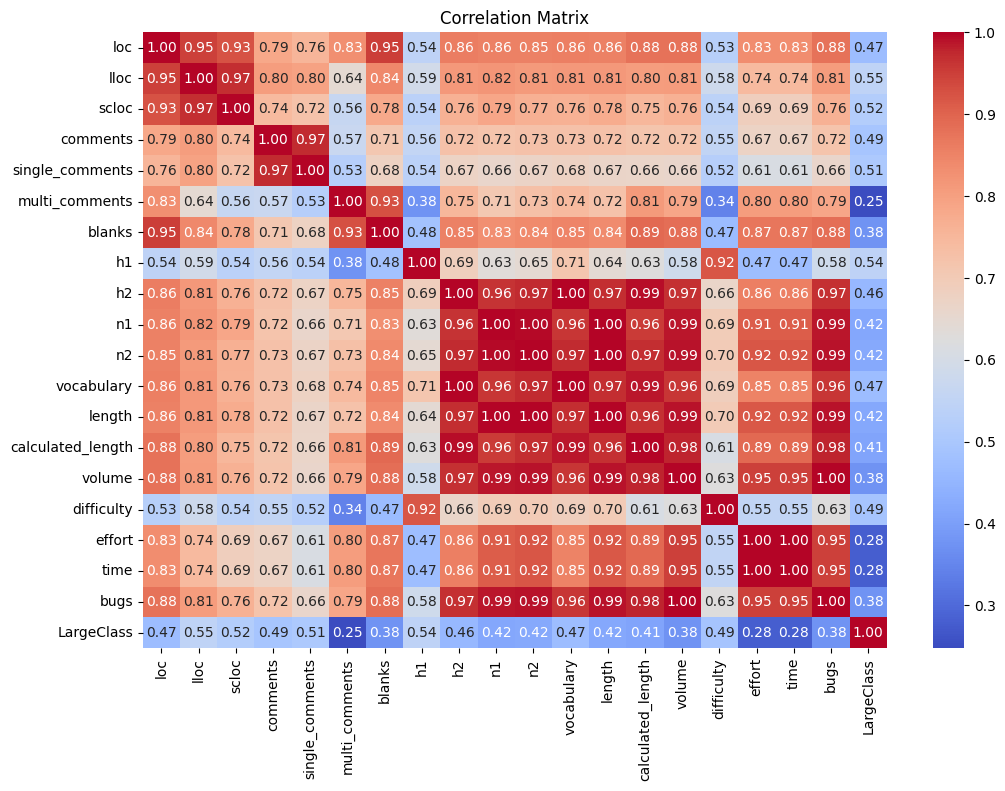


Missing Values per Feature:
Series([], dtype: int64)


In [18]:
explore_dataset('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Python_LargeClassSmell_Dataset.csv')

In [20]:
DT_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

Best MCC score is 0.8291396924669522
Best accuracy is 0.91175


In [21]:
RF_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

Best MCC score is 0.8810209320695127
Best accuracy is 0.9401249999999999


In [22]:
XGBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.7672756991800882
Best accuracy is 0.9265000000000001


In [23]:
XGBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:37:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.8893413303191234
Best accuracy is 0.9442500000000001


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
XGBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.9667004079078623
Best accuracy is 0.9832697320404545


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
LightGBM_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Total Bins 2193
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [26]:
LightGBM_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [27]:
LightGBM_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 643, number of negative: 600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3053
[LightGBM] [Info] Number of data points in the train set: 1243, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517297 -> initscore=0.069215
[LightGBM] [Info] Start training from score 0.069215
[LightGBM] [

In [28]:
AdaBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.7276961133961072
Best accuracy is 0.9137000000000001


In [29]:
AdaBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.8350150992138711
Best accuracy is 0.9169999999999999


In [30]:
AdaBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LargeClassSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.9472990223823641
Best accuracy is 0.9734959858200398


# **Long Method Dataset**

First few rows of the dataset:
   loc  lloc  scloc  comments  single_comments  multi_comments  blanks  h1  \
0  235   131    136         9                9              60      30   7   
1  162    64     67        20               20              49      26   9   
2   56    49     47         2                1               0       8   7   
3   49    23     45         3                3               0       1   1   
4  166   128    119        23               23               0      24  15   

   h2  n1   n2  vocabulary  length  calculated_length       volume  \
0  35  21   41          42      62         199.176390   334.323680   
1  28  19   38          37      57         163.135263   296.938842   
2  27  20   37          34      57         148.033447   289.985382   
3   3   2    4           4       6           4.754888    12.000000   
4  76  58  109          91     167         533.445850  1086.801705   

   difficulty        effort        time      bugs  long_method  
0    4.100000 

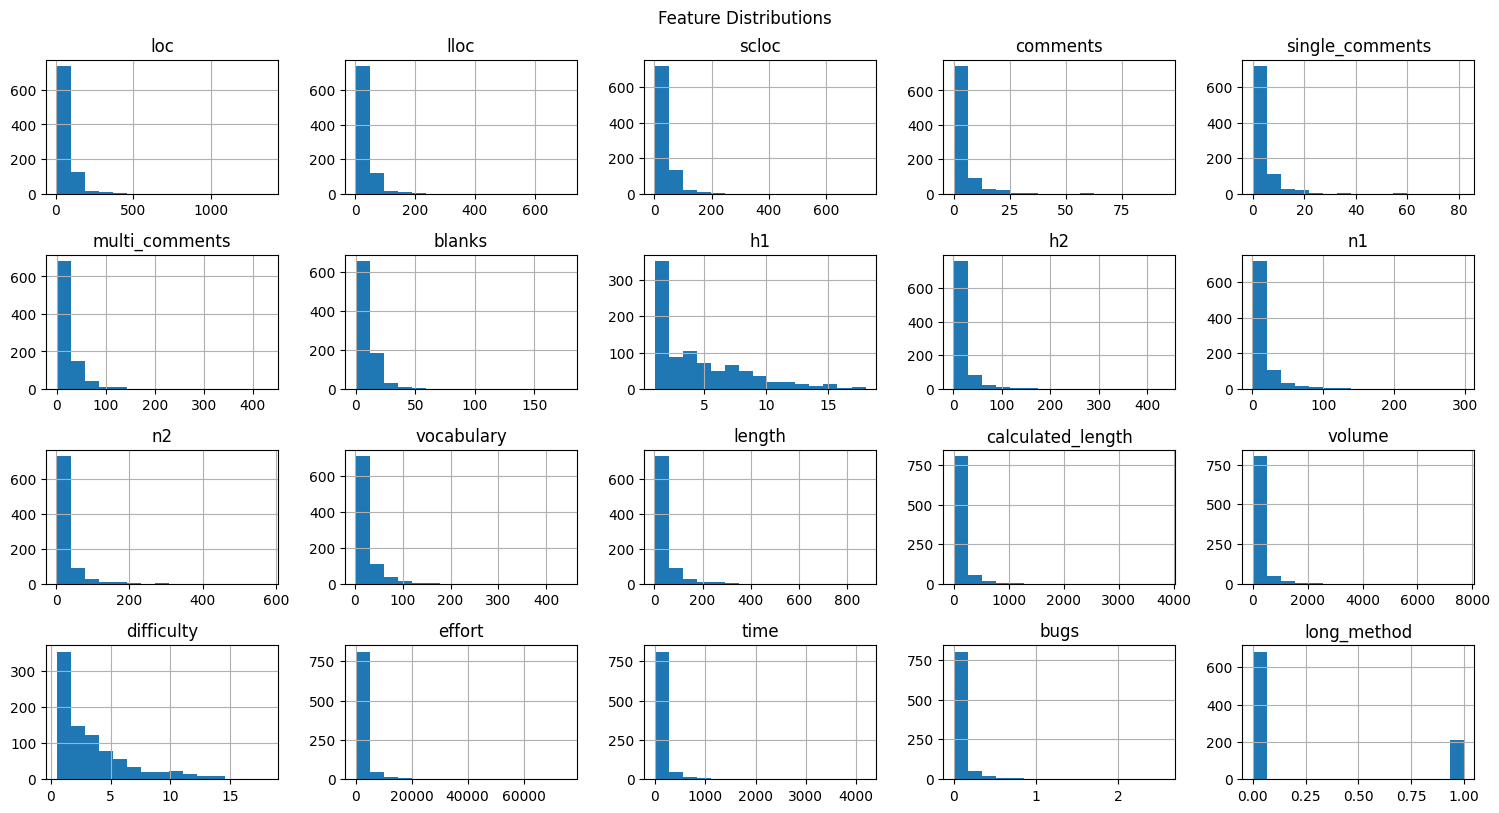

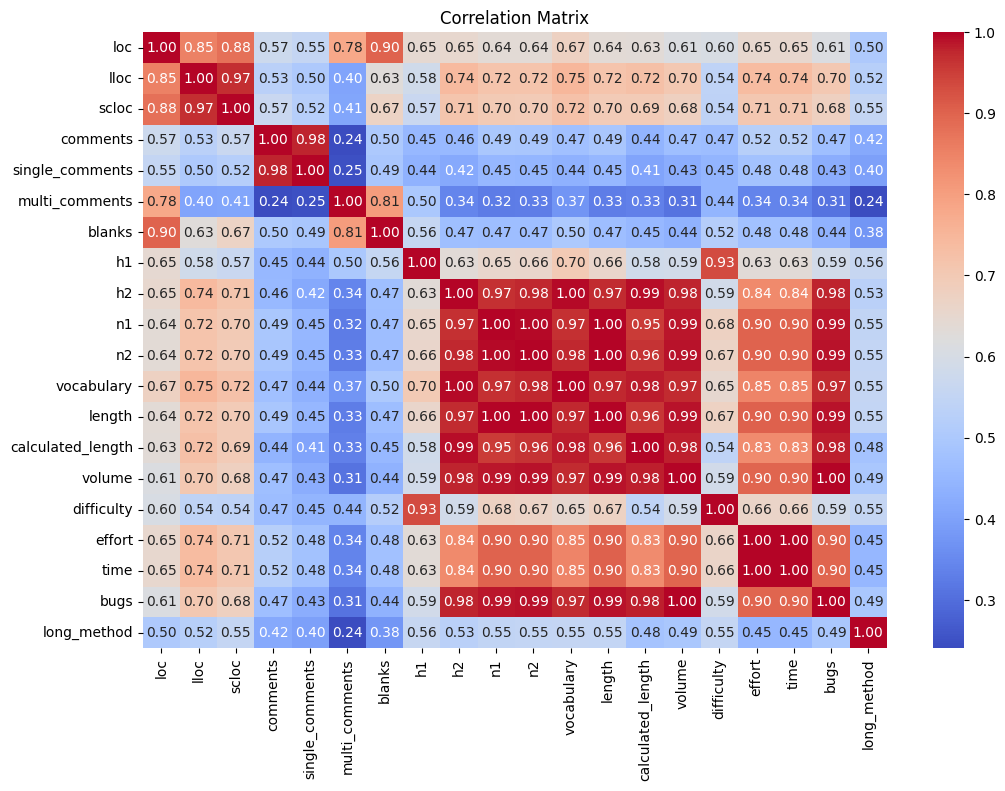


Missing Values per Feature:
Series([], dtype: int64)


In [19]:
explore_dataset('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Python_LongMethodSmell_Dataset.csv')

In [31]:
DT_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

Best MCC score is 0.9307609331665969
Best accuracy is 0.9650364963503651


In [32]:
RF_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

Best MCC score is 0.9433867340684304
Best accuracy is 0.9718978102189781


In [33]:
XGBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.8850848142700687
Best accuracy is 0.9583995006242199


In [34]:
XGBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.9459086610292448
Best accuracy is 0.9727007299270073


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [35]:
XGBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.9958993019679145
Best accuracy is 0.9979352380952381


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:46:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:46:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:46:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:46:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [36]:
LightGBM_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 189, number

In [37]:
LightGBM_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

[LightGBM] [Info] Number of positive: 617, number of negative: 616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 1233, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500406 -> initscore=0.001622
[LightGBM] [Info] Start training from score 0.001622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [38]:
LightGBM_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [39]:
AdaBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.8777688960305668
Best accuracy is 0.9552734082397005


In [40]:
AdaBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.9357868526399566
Best accuracy is 0.9675182481751824


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [41]:
AdaBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/GainRatio and Normalized/Python_LongMethodSmell_Dataset_NormalizedAndGainRatio.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.993395833174087
Best accuracy is 0.9966660317460319


# **Large Class using All Features**

In [42]:
DT_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

Best MCC score is 0.8406161462441851
Best accuracy is 0.919625


In [43]:
RF_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

Best MCC score is 0.8967756598261885
Best accuracy is 0.9481874999999998


In [44]:
XGBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.783489040185466
Best accuracy is 0.9312


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [45]:
XGBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.9164266619741156
Best accuracy is 0.9578125


In [46]:
XGBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:53:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:53:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:53:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:53:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:53:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.9721392399087543
Best accuracy is 0.9859830421377184


In [47]:
LightGBM_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Number of positive: 180, number of negative: 720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2728
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [48]:
LightGBM_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

[LightGBM] [Info] Number of positive: 720, number of negative: 720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4822
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 720, number of negative: 720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4820
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain

In [49]:
LightGBM_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

[LightGBM] [Info] Number of positive: 644, number of negative: 607
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4808
[LightGBM] [Info] Number of data points in the train set: 1251, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514788 -> initscore=0.059170
[LightGBM] [Info] Start training from score 0.059170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [50]:
AdaBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.7445348852217564
Best accuracy is 0.9192


In [51]:
AdaBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.8639895274647462
Best accuracy is 0.9316249999999999


In [52]:
AdaBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LargeClassSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.9674256061942998
Best accuracy is 0.9836079136690646


# **Long Method using All Features**

In [53]:
DT_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

Best MCC score is 0.9161528389687191
Best accuracy is 0.9580291970802919


In [54]:
RF_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

Best MCC score is 0.9429384816095608
Best accuracy is 0.9718978102189781


In [55]:
XGBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:00:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:00:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:00:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.8752511283003472
Best accuracy is 0.9543695380774033


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [56]:
XGBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.9520083046086676
Best accuracy is 0.9756934306569345


In [57]:
XGBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best MCC score is 0.9847809071715306
Best accuracy is 0.9923326984126984


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:02:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:02:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [58]:
LightGBM_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 188, number of negative: 617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2303
[LightGBM] [Info] Number of data points in the train set: 805, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233540 -> initscore=-1.188427
[LightGBM] [Info] Start training from score -1.188427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [59]:
LightGBM_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

[LightGBM] [Info] Number of positive: 617, number of negative: 616
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4810
[LightGBM] [Info] Number of data points in the train set: 1233, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500406 -> initscore=0.001622
[LightGBM] [Info] Start training from score 0.001622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 617, number of negative: 616
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overh

In [60]:
LightGBM_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 574, number of negative: 552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4789
[LightGBM] [Info] Number of data points in the train set: 1126, number of used feature

In [61]:
AdaBoost_Classifier('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.8791546506645136
Best accuracy is 0.9557078651685394


In [62]:
AdaBoost_SMOTE('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.9387838186681998
Best accuracy is 0.9691240875912409


In [63]:
AdaBoost_SMOTEENN('/content/drive/MyDrive/Colab Notebooks/ML Dataset/Normalized/Python_LongMethodSmell_Dataset_Normalized.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best MCC score is 0.9814697647984048
Best accuracy is 0.9906520634920635
